In [58]:
import pandas as pd

df = pd.read_csv('c:/data/school/data.csv')

df.head()

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,total_score,Label
0,12.4,95.6,10.6,13.3,33.3,5226,14.1,0.82,59.8,0
1,29.9,90.1,20.1,65.3,33.9,2473,15.6,0.63,59.8,0
2,24.7,82.6,18.9,43.5,28.4,2473,15.6,0.63,59.8,0
3,61.3,98.6,67.5,94.6,65.4,9666,10.5,0.54,76.1,1
4,62.4,98.8,57.0,95.0,49.8,9666,10.5,0.54,73.0,1


In [59]:
train_cols = df.columns[0:8]
print(train_cols)

X = df[train_cols]
y = df['Label']
print(df[train_cols].head())
print(y.head())

Index(['teaching', 'international', 'research', 'citations', 'income',
       'num_students', 'student_staff_ratio', 'international_students'],
      dtype='object')
   teaching  international  research  citations  income  num_students  \
0      12.4           95.6      10.6       13.3    33.3          5226   
1      29.9           90.1      20.1       65.3    33.9          2473   
2      24.7           82.6      18.9       43.5    28.4          2473   
3      61.3           98.6      67.5       94.6    65.4          9666   
4      62.4           98.8      57.0       95.0    49.8          9666   

   student_staff_ratio  international_students  
0                 14.1                    0.82  
1                 15.6                    0.63  
2                 15.6                    0.63  
3                 10.5                    0.54  
4                 10.5                    0.54  
0    0
1    0
2    0
3    1
4    1
Name: Label, dtype: int64


In [60]:
df.columns

Index(['teaching', 'international', 'research', 'citations', 'income',
       'num_students', 'student_staff_ratio', 'international_students',
       'total_score', 'Label'],
      dtype='object')

In [61]:
df.shape

(2603, 10)

In [62]:
df.describe

<bound method NDFrame.describe of       teaching  international  research  citations  income  num_students  \
0         12.4           95.6      10.6       13.3    33.3          5226   
1         29.9           90.1      20.1       65.3    33.9          2473   
2         24.7           82.6      18.9       43.5    28.4          2473   
3         61.3           98.6      67.5       94.6    65.4          9666   
4         62.4           98.8      57.0       95.0    49.8          9666   
...        ...            ...       ...        ...     ...           ...   
2598      36.7           72.7      38.8       71.6    33.9             0   
2599      46.2           27.7      39.6       59.7    77.1             0   
2600      43.3           52.0      49.5       41.7    99.9          3879   
2601      43.9           23.9      38.9       56.6    87.8             0   
2602      49.0           32.1      14.2       63.5    40.7             0   

      student_staff_ratio  international_students  to

In [63]:
df.groupby('Label').mean()

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,total_score
Label,,,,,,,,,
0,31.706997,50.156487,28.500232,55.836932,46.934847,22949.920760,19.033086,0.137312,56.969555
1,67.356404,60.983371,71.844719,85.579551,58.417079,25188.568539,13.149213,0.214247,73.650562


In [64]:
df['Label'].value_counts()

0    2158
1     445
Name: Label, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: bad, 1: good)')

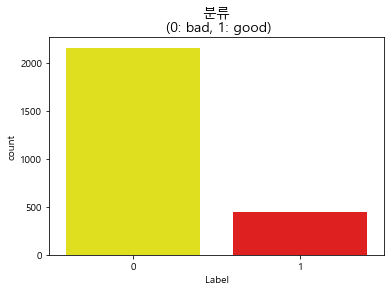

In [65]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
import seaborn as sns

colors = ['yellow', 'red']

sns.countplot('Label', data=df, palette=colors)
plt.title('분류\n (0: bad, 1: good)', fontsize=14)

In [66]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Label'])
df_samp = pd.concat([X_samp, y_samp], axis=1)

In [67]:
df_samp['Label'].value_counts()

0    445
1    445
Name: Label, dtype: int64

In [68]:
X = df_samp[train_cols]
y = df_samp['Label']

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [70]:
# 로지스틱 회귀분석
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=10, max_iter=500)
logit.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=10)

In [71]:
print('학습용:', logit.score(X_train, y_train))
print('검증용:', logit.score(X_test, y_test))

학습용: 0.8890449438202247
검증용: 0.8539325842696629


In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

In [73]:
result_tr = []
result_te = []

In [74]:
logit = LogisticRegression(random_state=10)
logit.fit(X_train_scaled, y_train)

LogisticRegression(random_state=10)

In [75]:
score_tr = logit.score(X_train_scaled, y_train)
score_te = logit.score(X_test_scaled, y_test)
print('학습용:', score_tr)
print('검증용:', score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용: 0.9887640449438202
검증용: 0.9943820224719101


In [76]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=10)
tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=10)

In [77]:
print('학습용:', tree.score(X_train_scaled, y_train))
print('검증용:', tree.score(X_test_scaled, y_test))

학습용: 1.0
검증용: 0.9719101123595506


In [78]:
#max_depth 가지치기
tree = DecisionTreeClassifier(max_depth=4, random_state=10)
tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=4, random_state=10)

In [79]:
score_tr = tree.score(X_train, y_train)
score_te = tree.score(X_test_scaled, y_test)
print('학습용:', score_tr)
print('검증용:', score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용: 0.5
검증용: 0.9775280898876404


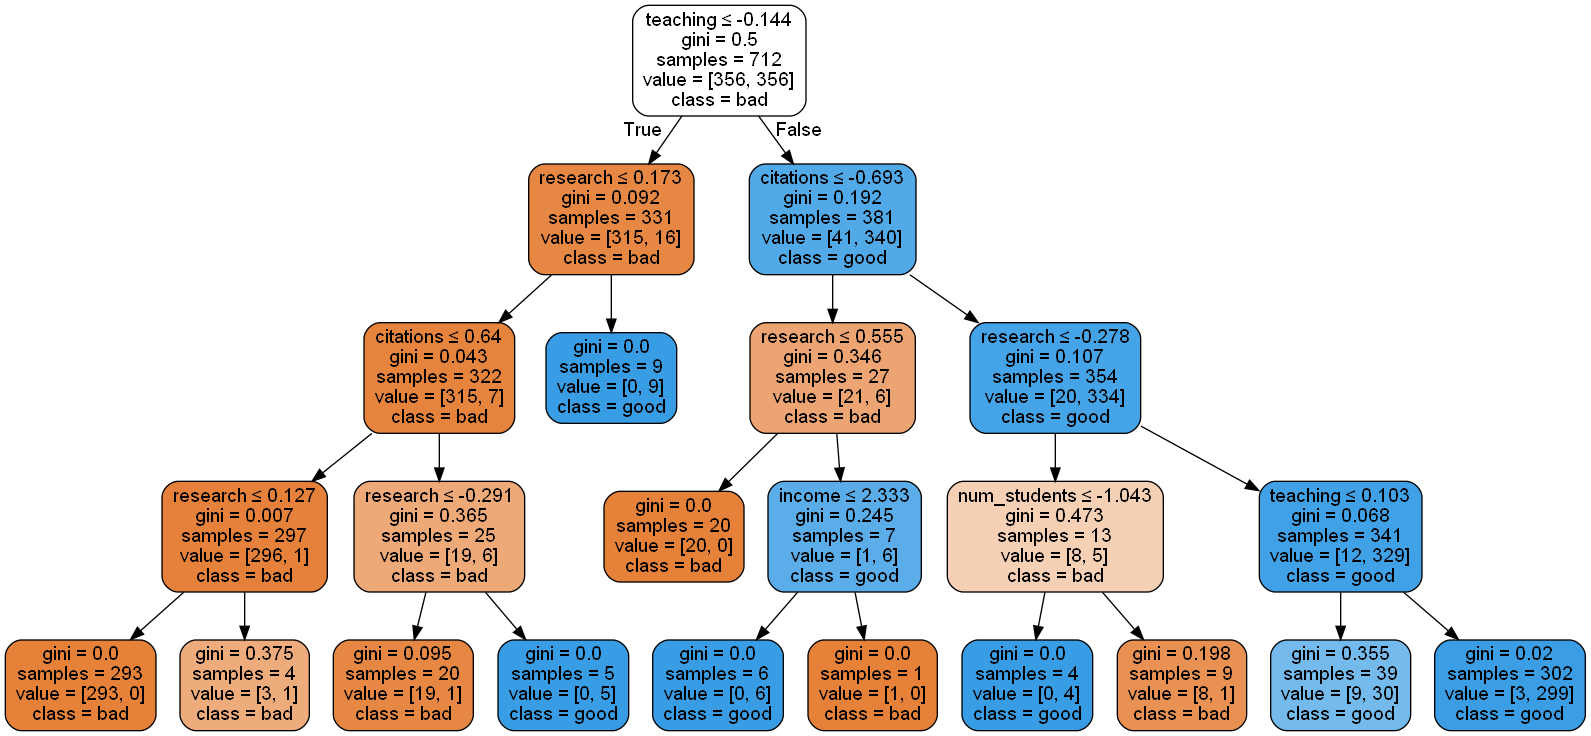

In [80]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image

dot_data = export_graphviz(tree, out_file=None, feature_names=train_cols,
class_names=['bad', 'good'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

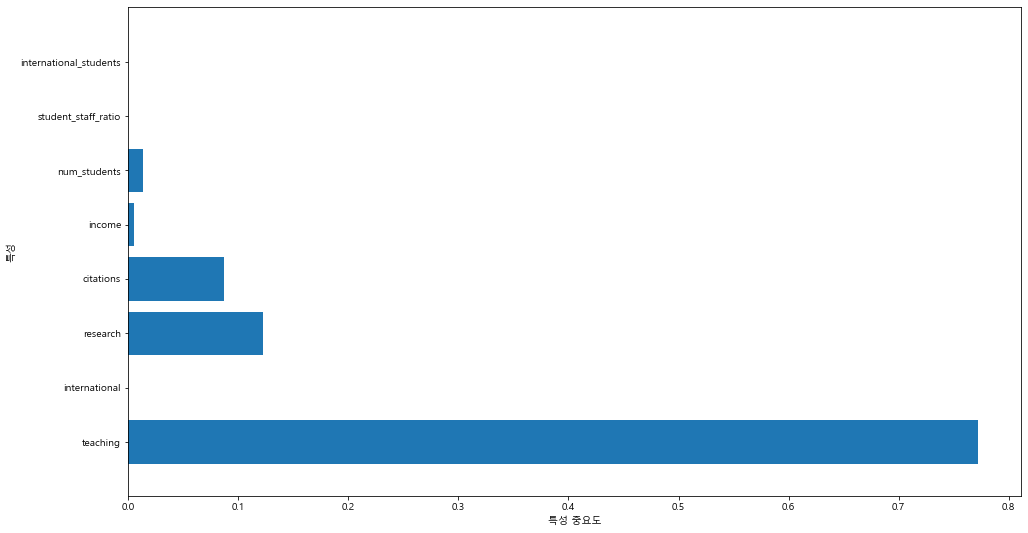

In [81]:
import numpy as np

def plot_tree(model):
    n_featrues = X.shape[1]
    plt.rcParams['figure.figsize']=(16,9)
    plt.barh(range(n_featrues), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_featrues), train_cols)
    plt.xlabel('특성 중요도')
    plt.ylabel('특성')
    plt.ylim(-1, n_featrues)

plot_tree(tree)

In [82]:
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=10)
forest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=10)

In [83]:
score_tr = forest.score(X_train_scaled, y_train)
score_tr = forest.score(X_test_scaled, y_test)
print('학습용:', score_tr)
print('검증용:', score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용: 0.9943820224719101
검증용: 0.9775280898876404


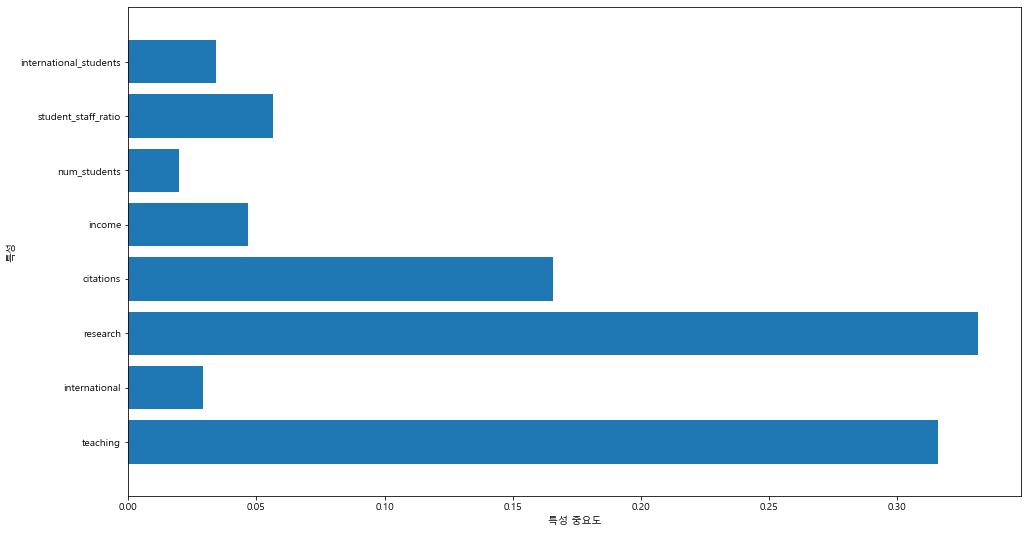

In [84]:
#특성의 중요도
plot_tree(forest)

최적의 k: 5
최적의 정확도: 0.9887640449438202


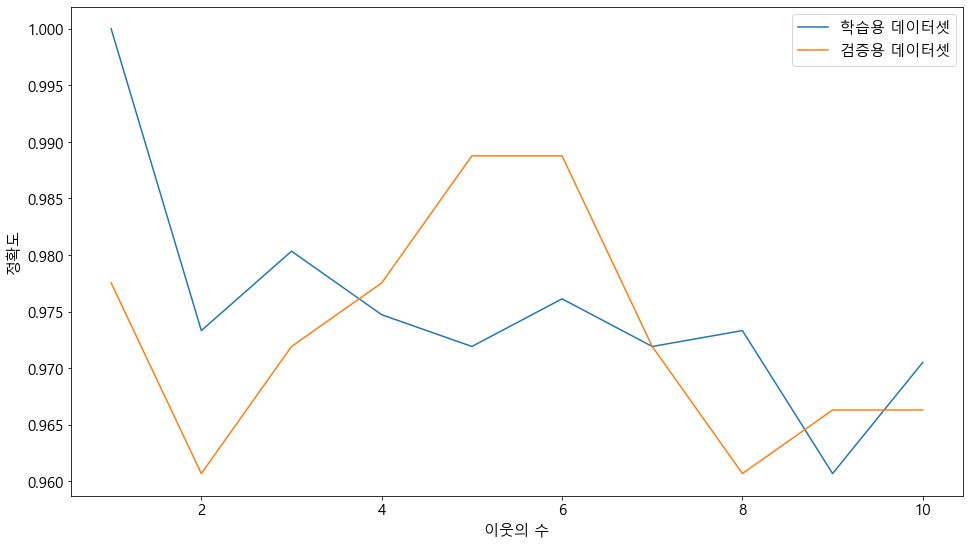

In [85]:
#knn
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
train_rate =[]
test_rate = []
# 새로운 데이터 포인트에 가장 가까운 k개의 이웃을 찾는다.
# k의 값에 따라 결과가 달라지므로 어떤 값이 최적인지 찾아내는 것이 필요
neighbors = range(1,11)
for n in neighbors:
    #모델 생성
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    #학습용 데이터셋과 검증용 데이터셋의 정확도
    train_rate.append(knn.score(X_train_scaled, y_train))
    test_rate.append(knn.score(X_test_scaled, y_test))

test_arr = np.array(test_rate)
max_rate = np.max(test_arr) # 가장 좋은 정확도
idx = np.where(test_arr == max_rate)[0][0] #가장 성능이 좋은 인덱스
print('최적의 k:', neighbors[idx])
print('최적의 정확도:', test_rate[idx])

plt.rcParams['font.size']=15
plt.plot(neighbors, train_rate, label='학습용 데이터셋')
plt.plot(neighbors, test_rate, label='검증용 데이터셋')
plt.ylabel('정확도')
plt.xlabel('이웃의 수')
plt.legend()

In [86]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [87]:
score_tr = knn.score(X_train_scaled, y_train)
score_te = knn.score(X_test_scaled, y_test)
print('학습용:', score_tr)
print('검증용:', score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용: 0.9803370786516854
검증용: 0.9719101123595506


In [88]:
#인공신경망

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=10, max_iter=400)
mlp.fit(X_train_scaled, y_train)

MLPClassifier(max_iter=400, random_state=10)

In [89]:
print('학습용:', mlp.score(X_train_scaled, y_train))
print('검증용:', mlp.score(X_test_scaled, y_test))

학습용: 0.9943820224719101
검증용: 1.0


In [90]:
score_tr = mlp.score(X_train_scaled, y_train)
score_te = mlp.score(X_test_scaled, y_test)
print('학습용:', score_tr)
print('검증용:', score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용: 0.9943820224719101
검증용: 1.0


In [91]:
#SVM
from sklearn.svm import SVC
svm = SVC(random_state=10)
svm.fit(X_train_scaled, y_train)

SVC(random_state=10)

In [92]:
print('학습용:', svm.score(X_train_scaled, y_train))
print('검증용:', svm.score(X_test_scaled, y_test))

학습용: 0.9873595505617978
검증용: 0.9887640449438202


In [93]:
#최적의 C value와 gamma value를 찾는 과정
import numpy as np
train_rate = []
test_rate = []

c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
g_values = [0.0001, 0.001, 0.01, 0.1]

for n in c_values:
    for g in g_values:
        #모델 생성
        svm = SVC(C=n, gamma=g, random_state=10)
        svm.fit(X_train_scaled, y_train)
        train_rate.append([n, g, svm.score(X_train_scaled, y_train)])
        test_rate.append([n,g,svm.score(X_test_scaled,y_test)])

최적의 c: 100
최적의 gamma: 0.01
최적의 정확도: 1.0


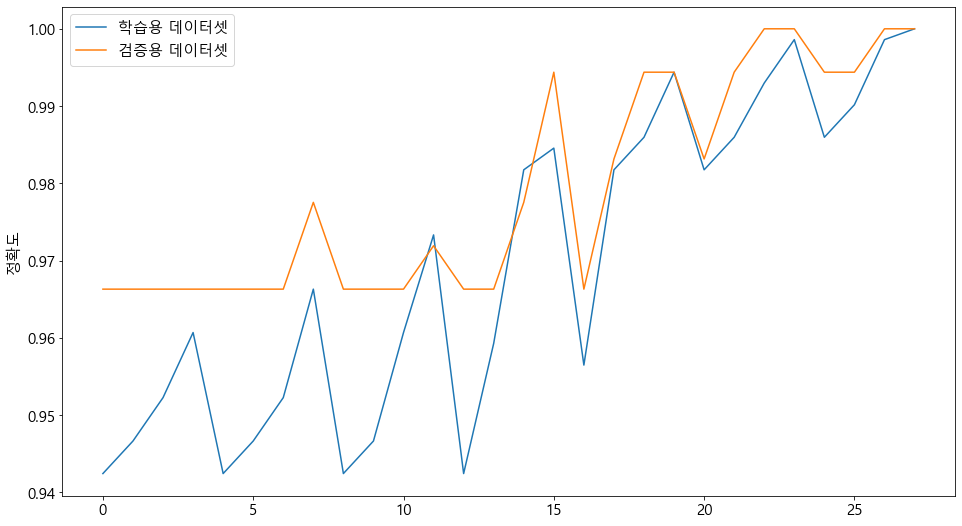

In [94]:
train_arr = np.array(train_rate) # 검증용 데이터셋의 정확도
test_arr = np.array(test_rate)
max_rate = np.max(test_arr[:,2])
idx = np.argmax(test_arr[:,2]) #제일 큰 인덱스
# [[cost, gamma, rate]]
print('최적의 c:', test_rate[idx][0])
print('최적의 gamma:', test_rate[idx][1])
print('최적의 정확도:', test_rate[idx][2])

plt.rcParams['font.size']=15
plt.plot(range(len(train_rate)), train_arr[:,2], label='학습용 데이터셋')
plt.plot(range(len(test_rate)), test_arr[:,2], label='검증용 데이터셋')

plt.ylabel('정확도')
plt.legend()

In [95]:
from sklearn.svm import SVC
svm = SVC(C=1, gamma=0.0001, random_state=100)
svm.fit(X_train_scaled, y_train)

SVC(C=1, gamma=0.0001, random_state=100)

In [96]:
score_tr = svm.score(X_train_scaled, y_train)
score_te = svm.score(X_test_scaled, y_test)
print('학습용:', score_tr)
print('검증용:', score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용: 0.9424157303370787
검증용: 0.9662921348314607


Text(0.5, 0, 'number of clusters')

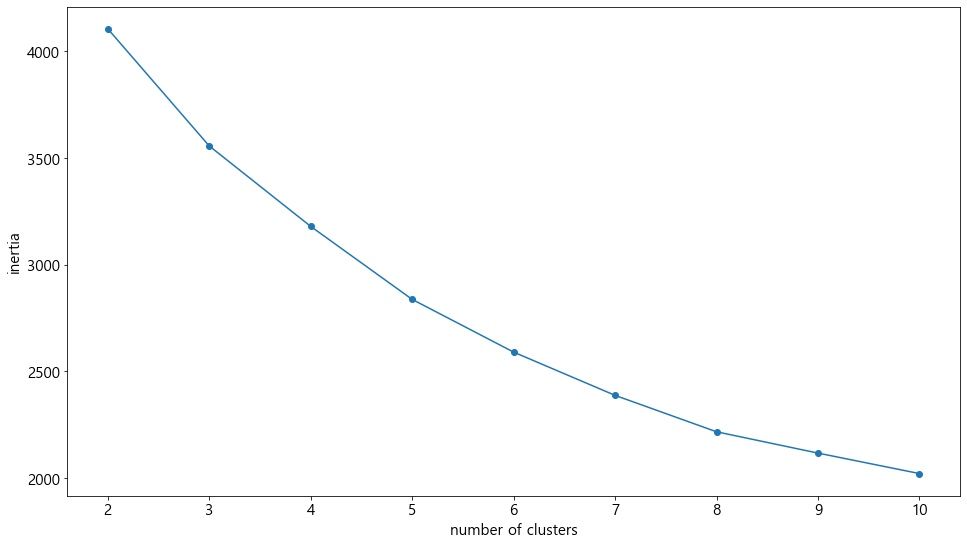

In [97]:
#군집화
# inertia value : 군집화가 된 후 각 중심점에서 군집의 데이터간의 거리를 합산한 값
from sklearn.cluster import KMeans

clusters = range(2,11)
inertias = []

for n in clusters:
    km = KMeans(n_clusters=n, random_state=10)
    km.fit(X_train_scaled)
    inertias.append(km.inertia_)

plt.rcParams['font.size']=15
plt.plot(clusters, inertias, '-o')
plt.ylabel('inertia')
plt.xlabel('number of clusters')
#엘보우기법

In [98]:
km = KMeans(n_clusters=5, random_state=10)
km.fit(X_train_scaled)
pred_tr = km.predict(X_train_scaled)
pred_te = km.predict(X_test_scaled)

In [99]:
from sklearn.metrics import silhouette_score
score_tr = silhouette_score(X_train_scaled, pred_tr)
score_te = silhouette_score(X_test_scaled, pred_te)

print(score_tr)
print(score_te)

0.20410528831789523
0.20148731094280548


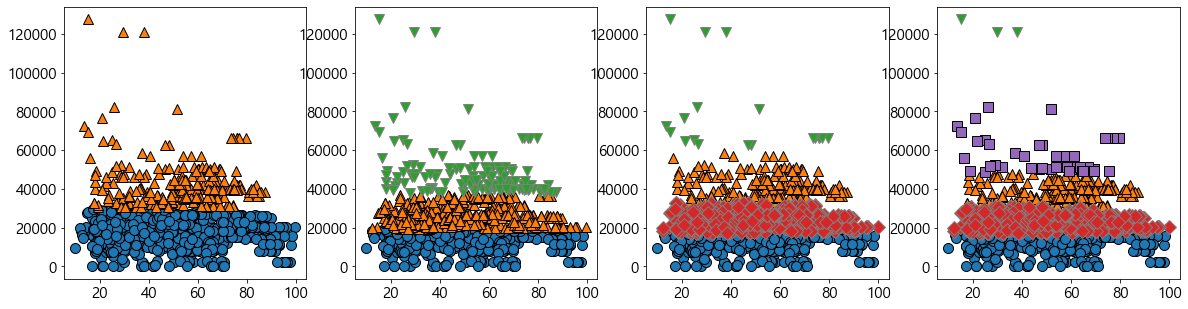

In [100]:
from matplotlib import pyplot as plt
import mglearn

#같은 데이터라도 k값을 어떻게 할당하느냐에 따라 클러스터링 결과가 달라짐
fig, axes = plt.subplots(1,4,figsize=(20,5))

idx=0
for k in [2,3,4,5]:
    km = KMeans(n_clusters=k)
    km.fit(X)
    lbls = km.labels_

    mglearn.discrete_scatter(X['teaching'], X['num_students'], lbls, ax=axes[idx])
    idx += 1

['LOGIT', 'Tree', 'RF', 'KNN', 'ANN', 'SVM']
[0.9887640449438202, 0.5, 0.9943820224719101, 0.9803370786516854, 0.9943820224719101, 0.9424157303370787]
[0.9943820224719101, 0.9775280898876404, 0.9775280898876404, 0.9719101123595506, 1.0, 0.9662921348314607]
최적의 알고리즘(학습용): RF
최적의 정확도(학습용): 0.9943820224719101
최적의 알고리즘(검증용): ANN
최적의 정확도(검증용): 1.0


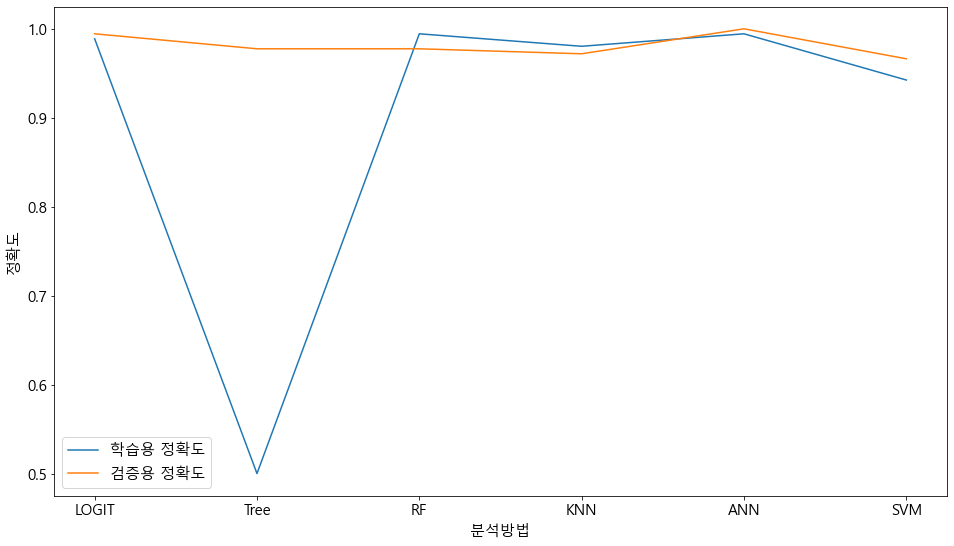

In [101]:
#알고리즘별 예측도 그래프
methods = ['LOGIT', 'Tree', 'RF', 'KNN', 'ANN', 'SVM']

result_tr_arr = np.array(result_tr)
max_rate_tr = np.max(result_tr_arr)
idx_tr = np.argmax(result_tr_arr)

result_te_arr = np.array(result_te)
max_rate_te = np.max(result_te_arr)
idx_te = np.argmax(result_te_arr)

print(methods)
print(result_tr)
print(result_te)
print('최적의 알고리즘(학습용):',methods[idx_tr])
print('최적의 정확도(학습용):', max_rate_tr)
print('최적의 알고리즘(검증용):', methods[idx_te])
print('최적의 정확도(검증용):', max_rate_te)

plt.rcParams['font.size'] = 15
plt.plot(methods, result_tr_arr, label='학습용 정확도')
plt.plot(methods, result_te_arr, label='검증용 정확도')
plt.xlabel('분석방법')
plt.ylabel('정확도')
plt.legend()